# Proyeccto del Sprint 13. 
# Descripción del proyecto. 

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

Tienes que:

Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
Analizar los factores que más impactan la pérdida.
Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
identificar a los grupos objetivo;
sugerir medidas para reducir la rotación;
describir cualquier otro patrón que observes con respecto a la interacción con los clientes.

## Paso 1. Descargar los datos
Model Fitness te aportó archivos CSV que contienen los datos sobre la cancelación de un mes en concreto e información del mes que lo precedía. El dataset incluye los siguientes campos:

'Churn' — la cancelación para el mes en cuestión
Campos de dataset actuales:
Datos del usuario del mes anterior
'gender'.
'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
'Phone' — si el/la usuario/a aportó el número de teléfono.
'Age'.
'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.
Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:
'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.
'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.
'Group_visits' — si el/la usuario/a participa en sesiones grupales.
'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.
'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.
'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.
Ruta de archivo: /datasets/gym_churn_us.csv. Descargar el dataset. 

### Inicializacion.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

### Cargar los datos.

In [2]:
gym_data = pd.read_csv('/datasets/gym_churn_us.csv')

## Paso 2. Llevar a cabo el análisis exploratorio de datos (EDA)
Observa el dataset: ¿contiene alguna característica ausente? 

Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

Crea una matriz de correlación y muéstrala.

### Observar el dataset. 

#### ¿Contiene alguna característica ausente?

In [3]:
print(gym_data.info())
print(gym_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Al observar el dataset podemos ver que no hay valores ausentes en ninguna columna del data frame.

### Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

In [4]:
print(gym_data.describe())

            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

Al observar el dataset podemos ver que los valores promedio de cada una de las columnas son: 0.510250 para gender, 0.845250 para Near_Location, 0.486750 para Partner, 0.3085 para Promo_friends, 0.9035 para Phone, 4.68125 para Contract_period, 0.41225 para Group_visits, 29.18425 para Age, 146.943728 para Avg_aditional_charges_total, 4.32275 para Month_to_end_contract, 3.72475 para Lifetime, 1.87902 para Avg_class_frequency_total, 1.767052 para Avg_class_frequency_current_month y 0.26525 para Churn.

Del mimso modo podemos ver que los valores de desviacion estandar son: 0.499957 para gender, 0.361711 para Near_Location, 0.499887 para Partner, 0.461932 para Promo_friends, 0.295313 para Phone, 4.549706 para Contract_period, 0.492301 para Group_visits, 3.258367 para Age, 96.355602 para Avg_aditional_charges_total, 4.191297 para Month_to_end_contract, 3.749267 para Lifetime, 0.972245 para Avg_class_frequency_total, 1.052906 para Avg_class_frequency_current_month y 0.441521 para Churn.

### Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [5]:
grouped_data = gym_data.groupby('Churn')
print(grouped_data.mean())

         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

Al observar los valores promedio de las caracteristica podemos ver los siguientes resultados cuando churn es igual a 0: 0.510037 para gender, 0.873086 para Near_Location, 0.534195 para Partner, 0.353522 para Promo_friends, 0.903709 para Phone, 5.747193 para Contract_period, 0.464103 para Group_visits, 29.976523 para Age, 158.445715 para Avg_aditional_charges_total, 5.283089 para Month_to_end_contract, 4.711807 para Lifetime, 2.024876 para Avg_class_frequency_total y 2.027882 para Avg_class_frequency_current_month y los valores cuando churn es igual a 1 son: 0.510839 para gender, 0.768143 para Near_Location, 0.355325 para Partner, 0.183789 para Promo_friends, 0.902922 para Phone, 1.728558 para Contract_period, 0.268615 para Group_visits, 26.989632 para Age, 115.082899 para Avg_aditional_charges_total, 1.662582 para Month_to_end_contract, 0.990575 para Lifetime, 1.474995 para Avg_class_frequency_total y 1.044546 para Avg_class_frequency_current_month.

Es importante destacar que en la columna de Near_Location, los clientes que permanecen (Churn = 0) tienen una mayor probabilidad de vivir o trabajar cerca del gimnasio con un promedio de 87.3% en comparación con aquellos que se van (Churn = 1) con un promedio de 76.8%, esto puede decrinos que la proximidad es un factor importante para la retención.
En el caso de la columna de Promo_friends, podemos ver que las ofertas promocionales “trae a un amigo/a” parecen ser más efectivas para los clientes que se quedan con un promedio de 35.4% que para los que se van con un promedido de 18.4%.
Para la columna Contract_period, nos podemos dar cuenta de que los clientes leales tienen contratos significativamente más largos con un promedio de 5.7 meses en comparación con los que cancelan con un promedio de 1.7 meses. Esto indica que los contratos más largos podrían asociarse con mayor retención, algo que es logico debido a que si los clientes firman contratos mas largos, esto los podria hacer sentir mas obligados a permanecer durante mas tiempo en el gimnasion en comparacion con los que firman contratos de un tiempo mas corto.
Para el caso de la columna Lifetime, podemos observar como es que los clientes que se quedan han sido usuarios durante más tiempo, con unos 4.7 meses en promedio, en comparacion con los que se van con 1 mes en promedio.
En la columna de Avg_class_frequency_current_month, vemos que la frecuencia promedio de visitas por semana en el mes actual es más alta para los clientes que permanecen con 2.02 visitas frente a los que se van con 1.04 visitas.

### Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

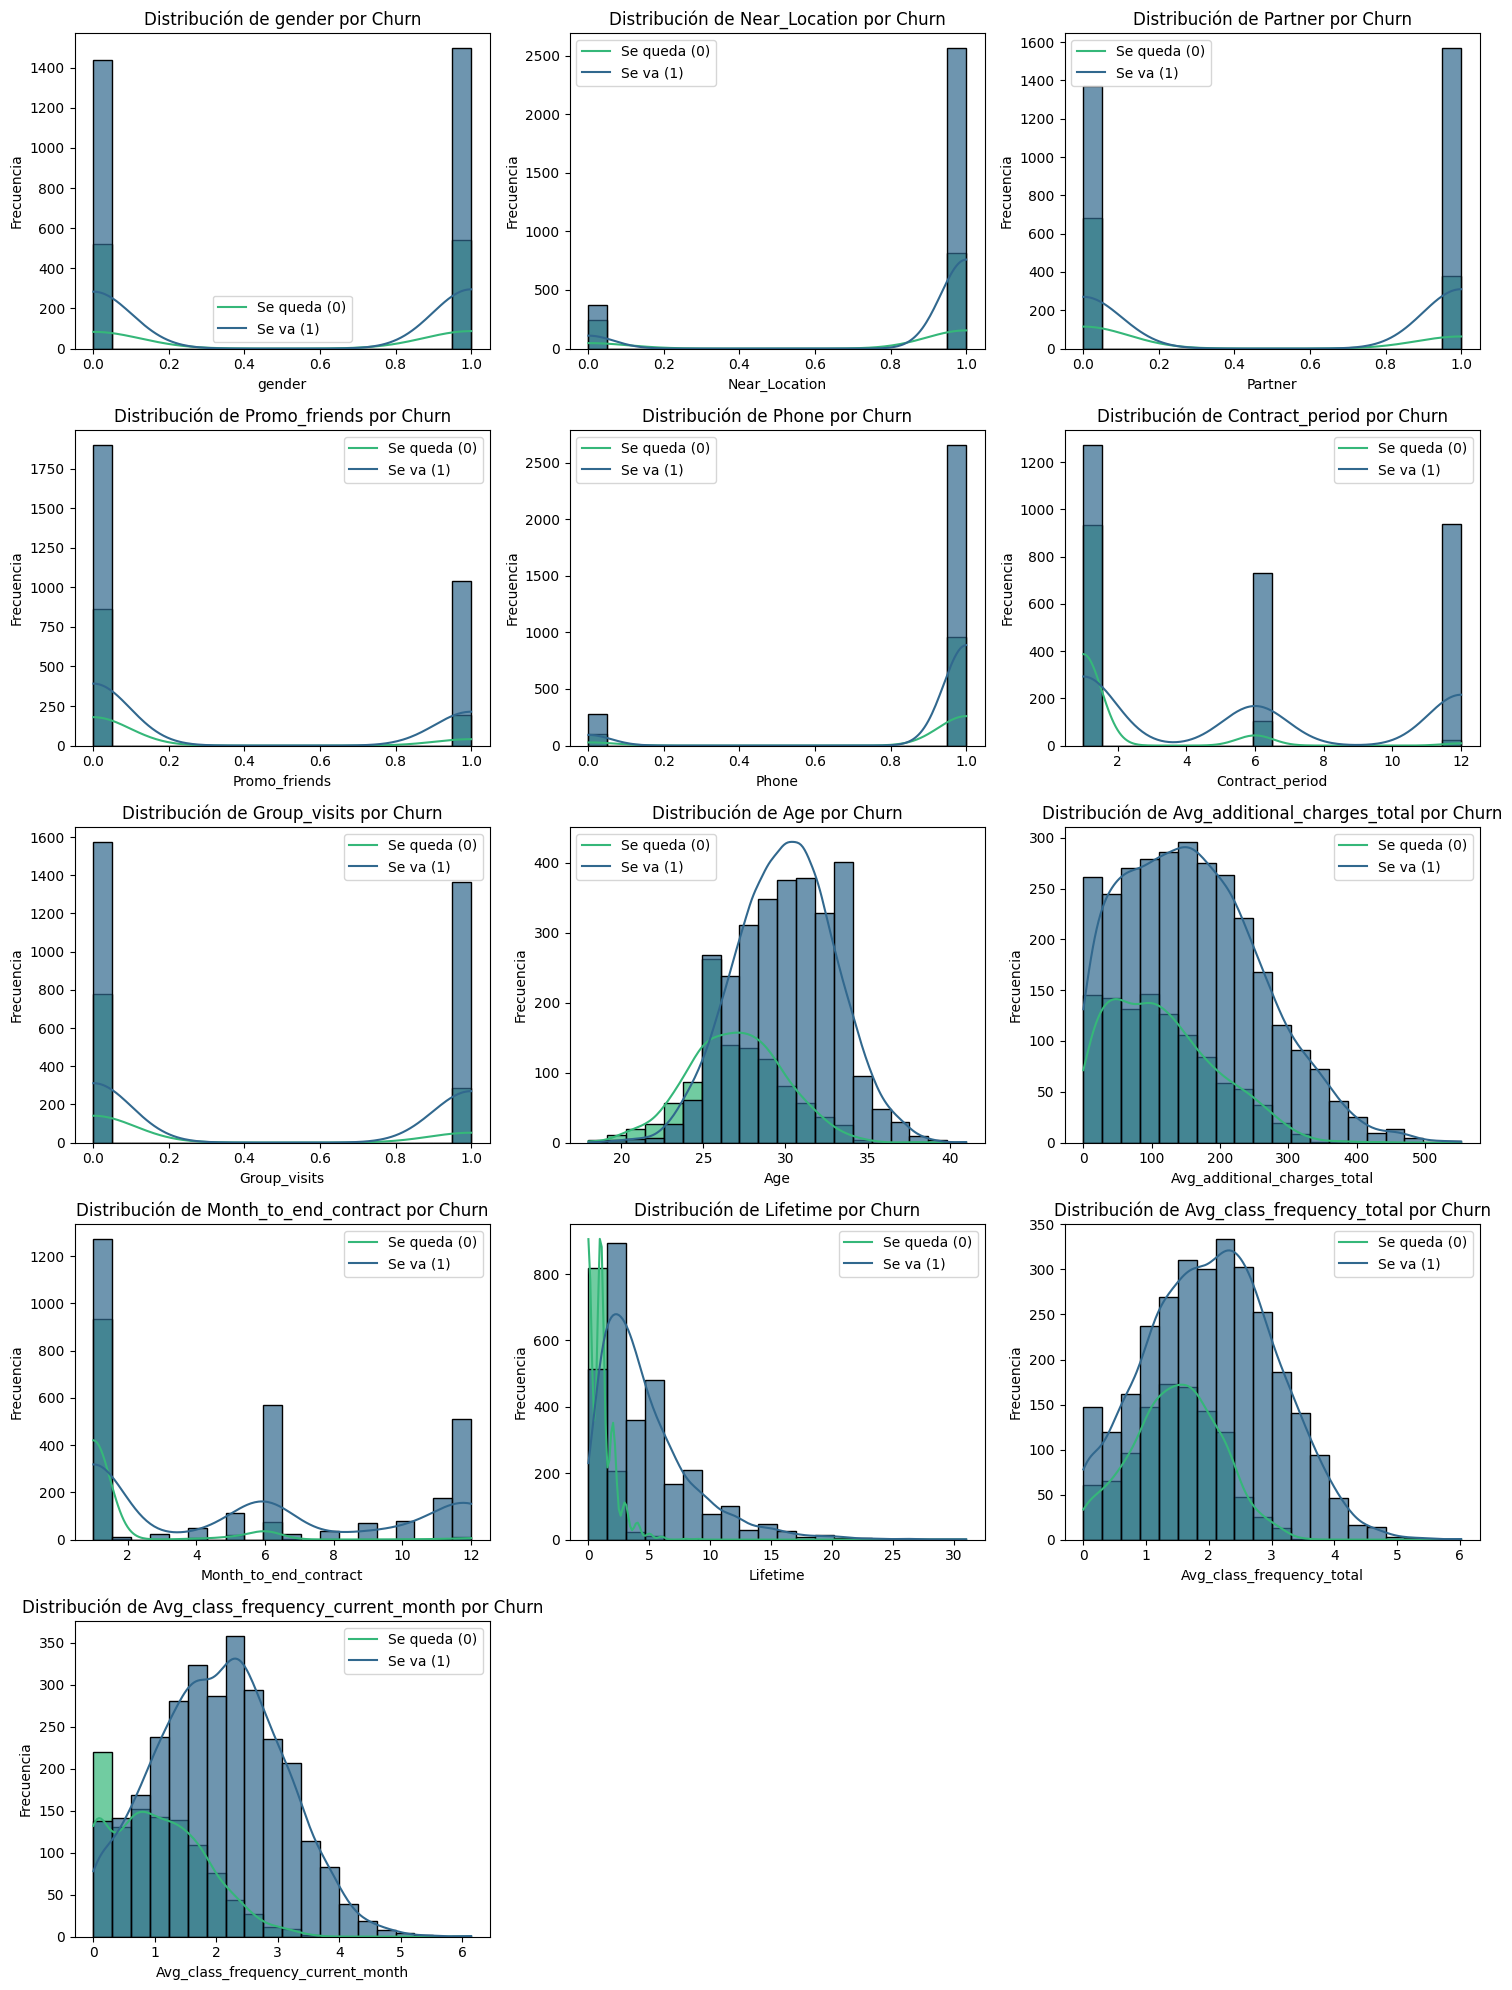

In [6]:
# Listamos las características para analizar (excluyendo 'Churn')
features = gym_data.drop(columns=['Churn'])

# Configuramos los gráficos
plt.figure(figsize=(15, 20))
for i, feature in enumerate(features):
    plt.subplot(5, 3, i+1) 
    sns.histplot(data=gym_data, x=feature, hue='Churn', kde=True, 
                 palette='viridis', alpha=0.7, bins=20)
    plt.title(f'Distribución de {feature} por Churn')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.legend(['Se queda (0)', 'Se va (1)'])

plt.tight_layout()
plt.show()

Una vez trazados los histogramas de barras y distribuciones de características para aquellas personas que se fueron y para las que se quedaron, podemos obervar de una manera mas grafica como se comportan las distribuciones, a continuacion explicare un poco mas acerca de ellas, por ejemplo: 

En el caso de la distribución de gender por Churn, podemos ver que la proporción de hombres y mujeres es similar en ambos grupos (se quedan o se van), lo que indica que el género no suele ser un factor muy influyente en la cancelación. 

En segundo lugar tenemos la distribución de Near_Location por Churn, en donde podemos ver que los clientes que viven o trabajan cerca del gimnasio tienen más probabilidades de quedarse, mientras que aquellos más alejados tienden a cancelar mas. 

En tercer lugar esta la distribución de Partner por Churn, en donde podemos ver que los clientes que trabajan en compañías asociadas son más propensos a quedarse, esto puede deberse posiblemente a los beneficios asociados que esto conlleve.

Luego en cuarto lugar esta la distribución de Promo_friends por Churn, en donde se puede observar como es que las promociones "trae a un amigo/a" parecen tener un impacto positivo en la retención de clientes, ya que los clientes adquiridos a través de esta estrategia suelen quedarse más.

En quinto lugar tenemos la distribución de Phone por Churn, en donde se puede ver que la proporción de clientes que proporcionaron un número de teléfono es muy similar entre ambos grupos, por lo que no parece influir en la cancelación.

En sexto lugar podemo ver la distribución de Contract_period por Churn, en donde podemos observar que los contratos más largos están asociados con clientes que permanecen, mientras que los contratos cortos son comunes entre quienes se van.

En septimo lugar esta la distribución de Group_visits por Churn, en donde podemos ver que los clientes que participan en actividades grupales tienen una mayor tendencia a quedarse, lo que sugiere que las actividades grupales contribuyen a la retención de los clients.

Despues esta la distribución de Age por Churn, en donde podemos ver que los clientes más jóvenes tienen una mayor probabilidad de cancelar en comparación con clientes de mayor edad.

Luego tenemos la distribución de Avg_additional_charges_total por Churn, en donde vemos que los clientes que gastan más en servicios adicionales son menos propensos a cancelar, indicando que mayor gasto está relacionado con mayor retención, y posiblemente sea igual en caso contrario.

Al ver el caso de Month_to_end_contract por Churn, podemos ver que los clientes con contratos más cercanos a su vencimiento tienen una mayor probabilidad de cancelar, que aquellos que no tienen contratos tan cercanos al vencimiento.

En el caso de Lifetime por Churn, podemos ver que los clientes con mayor tiempo de antigüedad en el gimnasio son más propensos a quedarse, mientras que los nuevos usuarios tienen una mayor tasa de cancelación.

Posteriormente en el caso de Avg_class_frequency_total por Churn, podemos ver que los clientes que asisten con mayor frecuencia a lo largo de su tiempo en el gimnasio tienen una mayor probabilidad de quedarse.

Por ultimo en el caso de la distribución de Avg_class_frequency_current_month por Churn, podemos ver que una alta frecuencia de visitas en el último mes se asocia con clientes que permanecen, mientras que una baja frecuencia es indicativa de cancelación.

### Crea una matriz de correlación y muéstrala.

                                     gender  Near_Location   Partner  \
gender                             1.000000       0.006699 -0.010463   
Near_Location                      0.006699       1.000000 -0.005119   
Partner                           -0.010463      -0.005119  1.000000   
Promo_friends                     -0.005033       0.210964  0.451960   
Phone                             -0.008542      -0.015763  0.009970   
Contract_period                    0.000502       0.150233  0.306166   
Group_visits                       0.017879       0.154728  0.022710   
Age                                0.013807       0.058358  0.047480   
Avg_additional_charges_total      -0.009334       0.040761  0.022941   
Month_to_end_contract             -0.001281       0.143961  0.294632   
Lifetime                           0.013579       0.070921  0.061229   
Avg_class_frequency_total          0.014620       0.043127  0.024938   
Avg_class_frequency_current_month  0.009156       0.062664  0.04

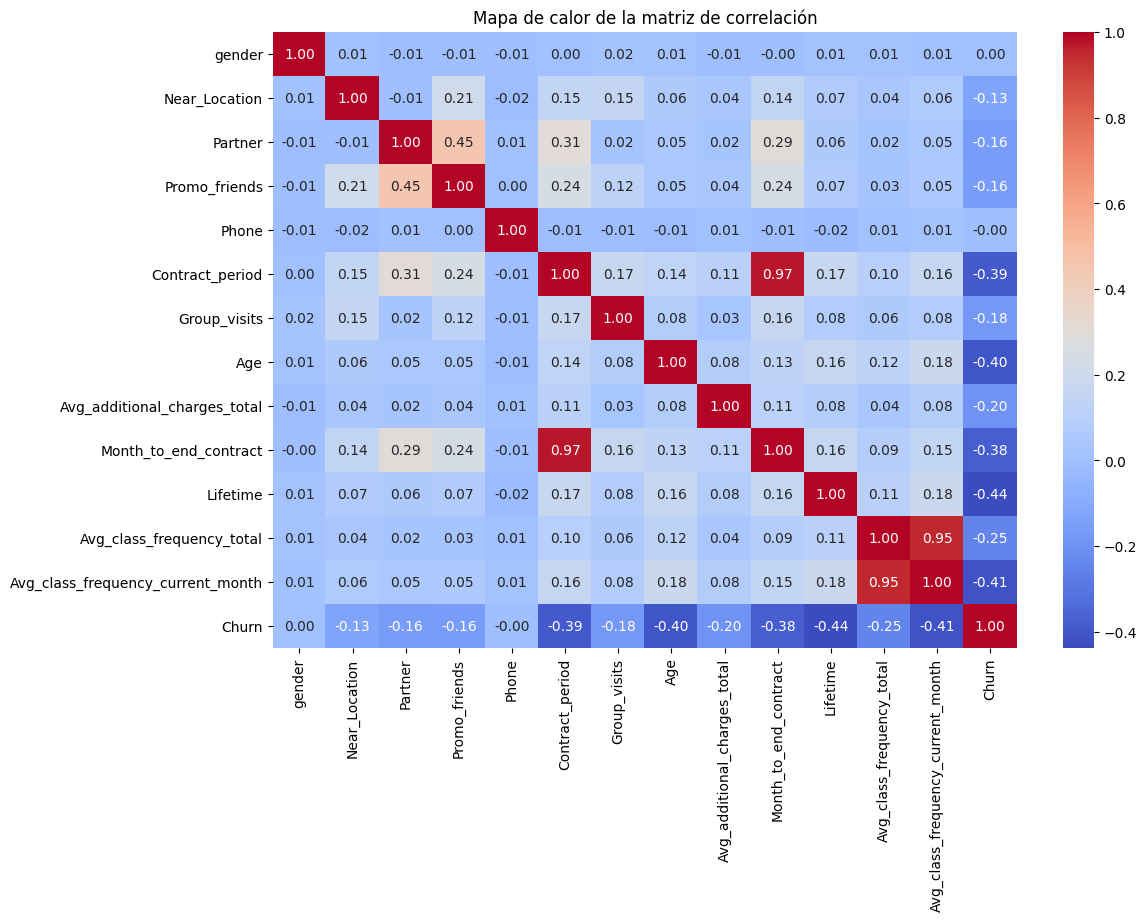

In [7]:
print(gym_data.corr())

plt.figure(figsize=(12, 8))
sns.heatmap(gym_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de la matriz de correlación")
plt.show()

En este caso una vez vista la matriz de correlacion graficada podemos ver que las caracteristicas o bien columnas que mayor correlacion tienen con la variable "Churn" son "Lifetime" con -0.44, luego esta "Avg_class_frequency_current_month" con -0.41, despues tenemos a "Age" con -0.40, posteriormente esta "Contract_period" con -0.39, por ultimo tenemos a "Month_to_end_Contract" con - 0.38, siendo estas las caracteristicas con mayor correlacion con la variable "Churn"

## Paso 3. Construir un modelo para predecir la cancelación de usuarios
Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

Entrena el modelo en el set de entrenamiento con dos métodos:
regresión logística;
bosque aleatorio.

Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

Recuerda indicar el parámetro random_state cuando dividas los datos y definas el algoritmo. 

### Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

In [8]:
# guardamos el DataFrame con las características transformadas
gym_data = pd.get_dummies(gym_data)

# dividimos los datos en características (la matriz X) y una variable objetivo (y)
X = gym_data.drop(columns = ['Churn'])
y = gym_data['Churn']
# dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 0)

### Entrena el modelo en el set de entrenamiento con dos métodos: regresión logística; bosque aleatorio.
### Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

In [9]:
# entrenamos el modelo en el set de entrenamiento con dos metodos, la regresion logistica y el bosque aleatorio.
# Definimos los modelos de regresión logística y bosque aleatorio
models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)]

# Entrenamos y evalúamos cada modelo
for model in models:
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    print(f"Modelo: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1: {f1_score(y_test, y_pred):.2f}\n")

/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo: LogisticRegression
Accuracy: 0.92
Precision: 0.87
Recall: 0.81
F1: 0.84

Modelo: RandomForestClassifier
Accuracy: 0.92
Precision: 0.84
Recall: 0.82
F1: 0.83



Una vez corridos ambos modelos podemos decir que la precision del modelo de regresion logistica es mayor con 0.87 con respecto al de bosque aleatorio con 0.84, sin embargo tambien podemos ver que el modelo de bosque aleatorio tuvo un recall mas alto con un 0.82 en comparacion con el de la regresion logistica de un 0.81. 

## Paso 4. Crear clústeres de usuarios/as
Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):

Estandariza los datos.

Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

Traza distribuciones de características para los clústeres. ¿Notas algo?

Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

### Estandariza los datos.

In [10]:
# Estandarizamos lo datos utilizando el metodo StandardScaler.
scaler = StandardScaler() 

X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

### Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.

In [ ]:
linked = linkage(X_train_st, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Agrupación jerárquica para GYM')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()

Una vez visto el dendograma se puede decir que podemos destacar 4 clusters, esto debido a que este el numero de los colores diferentes que aparecen en el grafico.

### Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)

### Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?

In [ ]:
# definimos el modelo k_means con 4 clústeres
km = KMeans(n_clusters = 5, random_state = 0)

labels = km.fit_predict(X_train_st)

# Creamos una copia explícita para evitar modificaciones sobre el original
X_train_clustered = X_train.copy()

# almacenamos etiquetas de clúster en el campo de nuestro conjunto de datos
X_train_clustered.loc[:, 'cluster_km'] = labels

# Obtenemos las estadísticas de los valores medios de las características por clúster
cluster_stats = X_train_clustered.groupby(['cluster_km']).mean()
print(cluster_stats)

Una vez visto el modelo de clustering podemos ver que en el cluster 0 están los clientes con contratos mas largos, los que mas trabajan en una compañia asociada, aquellos a los que les quedan mas meses antes de que termine su contrato, asi como tambien tenemos clientes que tienen una alta frecuencia de visitas por semana a lo largo de la vida del cliente.

En el caso del cluster 1 podemos ver que están los clientes que no viven cerca del gimnasio, aquellos que casi no se inscribieron mediante una oferta de amigos, asi como tambien tenemos clientes que tienen una baja frecuencia media de visitas por semana durante el mes en curso.

Para el caso del cluster 2 podemos ver que hay clientes que definitivamente si viven muy cerca del gimnasio, aquellos que menos trabajan en una compañia asociada, los que tienen el periodo de contrato mas corto de todos, aquellos que son los de menor edad, los que tienen el menor promedio de cargos en otros servicios ofrecidos por el gimnasio, a los que les quedan menos meses para que se termine su contrato y del mimos modo son tambien aquellos que menos tiempo llevan inscritos, por ultimo tambien se puede ver que son aquellos clientes que menos frecuencia tienen de ir al gimnasio.'

En el caso del cluster 3 podemos observar que hay clientes que viven relativamente cerca del gimnasio, aquellos que tienen la mayor edad, asi como tambien aquellos que tienen el mayor promedio de cargos en otros servicios ofrecidos por el gimnasio, y también son aquellos que tienen el mayor tiempo siendo clientes del gimnasio, del mismo modo son aquellos que van al gimnasio con mas frecuencia en general.

Por ultimo para el caso del cluster 4 podemos ver que aquí se encuentran los clientes con contratos de duración media, ni muy largos ni muy cortos, asi como tambien con una frecuencia de visitas moderada, siendo tal vez el grupo de clientes con mayor estabilidad en comparación con los demás clusters.

### Traza distribuciones de características para los clústeres. ¿Notas algo?

In [ ]:
# Listamos las características para graficar
features = ['Contract_period', 'Group_visits', 'Age', 
            'Avg_additional_charges_total', 'Month_to_end_contract', 
            'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

# Configuramos el tamaño del gráfico
plt.figure(figsize=(20, 15))

# Generamos el histograma para cada característica
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=X_train_clustered, x=feature, hue='cluster_km', kde=True, palette='Set2', bins=30)
    plt.title(f'Distribución de {feature} por Clúster')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

En el grafico de Contract_period podemos ver que el l Cluster 0 tiene contratos más largos, principalmente de 12 meses, por otro lado los clientes del Cluster 2 tienen los contratos más cortos, principalmente de 1-3 meses, mientras que en el Cluster 4 se presenta un equilibrio entre contratos de duración media (6 meses). 
En el grafico de Group_visits podemos ver que el Cluster 0 tiene una proporción mayor de clientes que participan en visitas grupales, mientras que el Cluster 1 y 2 tienen menos participación en actividades grupales.

En el caso de Age podemos observer como es que los clientes del Cluster 3 tienden a ser mayores en comparación con otros clústeres, mientras que los clientes del Cluster 2 son los más jóvenes.

En el grafico de Avg_additional_charges_total podemos ver como es que el Cluster 3 tiene los gastos más altos en servicios adicionales como cafetería, masajes o productos deportivos, mientras que el Cluster 2 tiene los gastos más bajos.   

Para Month_to_end_contract podemos ver que el Cluster 0 tiene la mayor cantidad de meses restantes, y en caso contrario el Cluster 2 y Cluster 3 tienen menos tiempo para que finalicen sus contratos.

En el grafico de Lifetime podemos observar como es que el Cluster 3 tiene los clientes que han estado más tiempo inscritos, mientras que el Cluster 2 tiene el menor tiempo de membresía.

Finalmente en el caso de los graficos de Avg_class_frequency_total y Avg_class_frequency_current_month podemos ver como el Cluster 3 tiene las frecuencias más altas de visitas tanto a lo largo del tiempo como en el último mes, mientras que el Cluster 2 tiene frecuencias significativamente más bajas.

### Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [ ]:
X_train_clustered = X_train_clustered.copy() 
X_train_clustered['Churn'] = y_train.values 

# Calculamos la tasa de cancelación para cada clúster
churn_rate_per_cluster = X_train_clustered.groupby('cluster_km')['Churn'].mean()

# Imprimimos la tasa de cancelación para cada clúster
print("Tasa de cancelación por clúster:")
print(churn_rate_per_cluster)

Una vez vista la tasa de cancelacion por cluster, podemos decir que el cluster con la mayor tasa de cancelacion es el cluster numero 2 con poco mas de la mitad (53.1219%) de los usuarios pertenecientes a ese cluster, luego en segundo lugar esta el cluster numero 1 con un 43.4010% de tasa de cancelacion, le sigue el cluster numero 4 con un 28.5223 % de tasa de cancelacion, en penultimo lugar esta el cluster numero 3 con una tasa de cancelacion de 7.1327%, finalmente esta el cluster numero 0 con una tasa de cancelacion de 2.8571%.

## Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes
### Llega a conclusiones y formula recomendaciones con respecto a la estrategia para la interacción y retención de clientes.
No necesitas entrar en detalles. Bastarán tres o cuatro principios esenciales y ejemplos de su implementación en forma de pasos de marketing específicos.

En conclusion se observa que el Cluster con mayores cancelaciones es el Cluster numero 2, el cual, además, tiene los contratos mas cortos, asi como tambien poca participacion en actividades grupales y en asistencia en general al gimnasio, del mismo modo podemos observar como es que este cluster es en el que hay menos empleados que trabajan en empresas asociadas, asi como tambien tiene el promedio de gastos mas bajos en servicios adicionales como cafeteria, masajes y productos deportivos, esto puede deberse a que tiene el promedio de edad mas bajo en comparacion con los otros clusters, todo esto a pesar de ser el Cluster que mayor cercania tiene al gimnasio en comparacion con los demas clusters.

El segundo Cluster con mayores cancelaciones es el numero 1, en donde este tiene pocas asistencias a actividades grupales, asi como tambien pocas inscripciones mediante una oferta "trae a un/a amigo/a". 

Es por lo anterior que podemos decir que la implementacion de promociones de contratos mas largos y de la promocion de "trae a un amigo" no son cosas muy atractivas para algunos usuarios, sin embargo lo que si puede ser mas atractivo pueden ser las modificaciones a estas promociones y la incorporacion de unas nuevas.

Recomendaciones.
Estrategia de promociones integradas.

Al generar promociones integradas combinando como una de "contratos mas largos por menor precio" y la de "trae a un/a amigo/a" para poder incentivar a los usuarios, es decir, unir ambas promociones para generar una mejora en la estancia en el largo plazo de los usuarios, ademas se podrian ofrecer beneficios adicionales como descuentos en servicios extras que normalmente se pagan como la cafeteria, masajes o productos deportivos dentro de las promociones activas puede incentivar de alguna manera la permanencia de los usuarios de estos clusters. 

Programas con un enfoque hacia los jovenes.

Otra manera de incentivar la permanencia de los usuarios podria ser mediante la creacion de paquetes especificos en donde se incluyan actividades atractivas para usuarios Jovenes, como entrenamientos grupales, ademas de ofrecer promociones especificas para las clases grupales en donde se den descuentos o recompensas al asistir a un cierto numero de clases grupales.

Fomento de programas de lealtad.
Ademas tambien se podrian ofrecer contratos flexibles con incentivos a renovaciones automaticas, en donde ademas se implemente un programa de lealtad a traves del cual se otorguen recompensas a los usuarios mas frecuentes en el corto y largo plazo implementando tal vez membresias premium o acceso prioritario a ciertos servicios.